In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [63]:
voter = pd.read_csv ('voter_updated.csv')
voter.drop(voter[voter['president_voted_for'] > 2].index, inplace = True)
voter.drop(voter[voter['party'] > 3].index, inplace = True)

voter_general = voter[["party", "levels_of_party", "race", "education", "gender", "age_group", "state_of_residence", "president_voted_for", "idealogy"]]
voter_importance_1 = voter[["party", "president_voted_for", "idealogy", "gender", "age_group", "education", "environment_importance", "health_care_importance", "climate_change_importance", "global_warming", "religion_importance"]]
voter_importance_2 = voter[["party", "president_voted_for", "idealogy", "gender", "age_group", "immigration_importance", "gay_rights_importance", "abortion_importance",  "gender_equality_importance", "legality_abortion", "gay_marriage"]]
temp_1 = voter[["race", "education", "gender", "age_group", "state_of_residence", "president_voted_for", "party"]]

In [51]:
print(temp_1.dtypes)
col_names = list(temp_1)
for col in col_names:
        temp_1[col] = temp_1[col].astype('category',copy=False)

print(temp_1.dtypes)

race                     int64
education                int64
gender                   int64
age_group                int64
state_of_residence       int64
president_voted_for    float64
dtype: object
race                   category
education              category
gender                 category
age_group              category
state_of_residence     category
president_voted_for    category
dtype: object


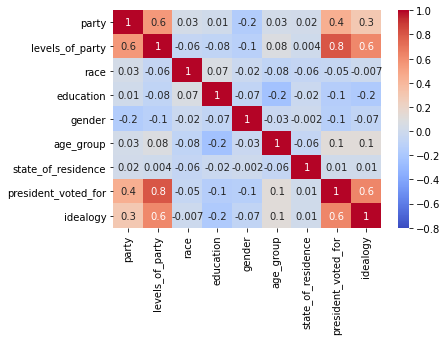

In [15]:
heatmap = sns.heatmap(voter_general.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":10})

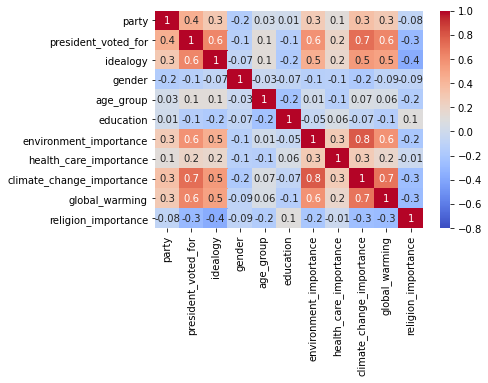

In [17]:
heatmap = sns.heatmap(voter_importance_1.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":10})

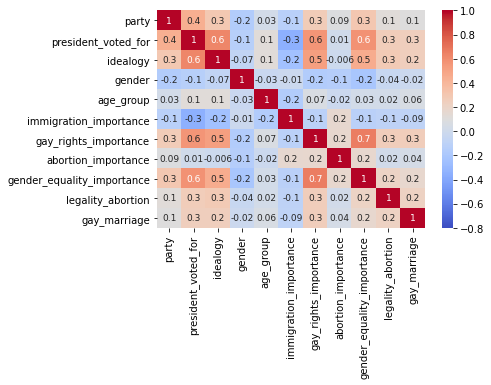

In [22]:
heatmap = sns.heatmap(voter_importance_2.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":9})

In [10]:
voter_general[(voter_general.race == 1) & (voter_general.party == 2)]

party  levels_of_party  race  education  gender  age  \
1         2                7     1          3       2   64   
4         2                7     1          5       1   64   
7         2                7     1          2       1   72   
12        2                7     1          5       1   48   
17        2                7     1          5       1   58   
...     ...              ...   ...        ...     ...  ...   
7982      2                6     1          3       1   54   
7986      2                7     1          2       2   69   
7987      2                7     1          5       2   68   
7996      2                6     1          3       2   55   
7997      2                7     1          2       2   82   

      state_of_residence  president_voted_for  idealogy  
1                      4                  2.0       4.0  
4                     48                  2.0       4.0  
7                     55                  2.0       4.0  
12                    53                  2.0       4.0  
17                    47                  2.0       4.0  
...                  ...                  ...       ...  
7982                  12                  NaN       3.0  
7986                  42                  2.0       4.0  
7987                  53                  2.0       5.0  
7996                  27                  2.0       3.0  
7997                  30                  2.0       5.0  

[1977 rows x 9 columns]

In [21]:
voter.isnull()
voter.isnull().sum()

party                           0
levels_of_party                 0
race                            0
gender                          0
education                       0
state_of_residence              0
president_voted_for           361
idealogy                        4
immigration_importance        113
environment_importance        122
gay_rights_importance         117
health_care_importance        106
climate_change_importance     101
abortion_importance           100
racial_equality_importance    102
gender_equality_importance    115
legality_abortion              15
gay_marriage                   14
police_racial_bias             29
global_warming                 11
religion_importance             0
age                             0
age_group                       0
dtype: int64

idealogy  age_group
1.0       1              87
          2             103
          3             149
          4             167
          5              93
2.0       1             103
          2             137
          3             281
          4             487
          5             243
3.0       1             105
          2             185
          3             480
          4            1270
          5             475
4.0       1              42
          2             102
          3             347
          4             925
          5             482
5.0       1              31
          2              70
          3             202
          4             297
          5             148
6.0       1              15
          2              14
          3              43
          4              77
          5              20
dtype: int64


<AxesSubplot:xlabel='idealogy,age_group'>

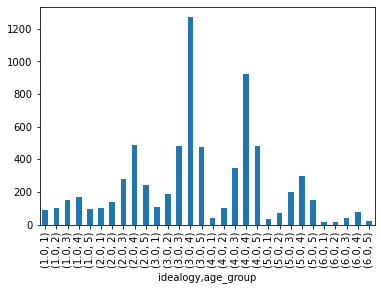

In [37]:
count = voter_importance_1.groupby(['idealogy', 'age_group']).size() 
print(count)
count.plot.bar()

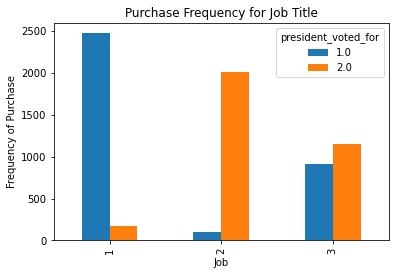

In [24]:
pd.crosstab(voter_general.party,voter_general.president_voted_for).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [40]:
voter_general = voter_general.dropna()
x = voter_general.drop('president_voted_for', axis=1)
y = voter_general['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91      1138
         2.0       0.91      0.89      0.90      1113

    accuracy                           0.91      2251
   macro avg       0.91      0.91      0.91      2251
weighted avg       0.91      0.91      0.91      2251

[[1043   95]
 [ 118  995]]
0.9053753887161262


In [28]:
voter_importance_1 = voter_importance_1.dropna()
x = voter_importance_1.drop('president_voted_for', axis=1)
y = voter_importance_1['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.88      0.92      0.90      1075
         2.0       0.92      0.88      0.90      1106

    accuracy                           0.90      2181
   macro avg       0.90      0.90      0.90      2181
weighted avg       0.90      0.90      0.90      2181

[[993  82]
 [134 972]]
0.9009628610729024


In [29]:
voter_importance_2 = voter_importance_2.dropna()
x = voter_importance_2.drop('president_voted_for', axis=1)
y = voter_importance_2['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.89      0.88      0.89      1105
         2.0       0.88      0.89      0.88      1061

    accuracy                           0.89      2166
   macro avg       0.89      0.89      0.89      2166
weighted avg       0.89      0.89      0.89      2166

[[973 132]
 [115 946]]
0.8859649122807017


In [36]:
temp_1 = temp_1.dropna()
x = temp_1.drop('president_voted_for', axis=1)
y = temp_1['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.61      0.59      0.60      1153
         2.0       0.58      0.60      0.59      1099

    accuracy                           0.59      2252
   macro avg       0.59      0.59      0.59      2252
weighted avg       0.59      0.59      0.59      2252

[[680 473]
 [440 659]]
0.594582593250444


In [56]:
temp_1 = temp_1.dropna()
x = temp_1[["gender", 'age_group']]
y = temp_1['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.57      0.69      0.62      1153
         2.0       0.58      0.45      0.50      1099

    accuracy                           0.57      2252
   macro avg       0.57      0.57      0.56      2252
weighted avg       0.57      0.57      0.56      2252

[[793 360]
 [608 491]]
0.5701598579040853


In [64]:
temp_1 = temp_1.dropna()
x = temp_1[["gender", 'age_group','party']]
y = temp_1['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)


model = RandomForestClassifier(n_estimators = 10, random_state = 30)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Accuracy =  0.8357015985790408
party        0.952069
age_group    0.032975
gender       0.014955
dtype: float64
